# Housing price prediction

In [1]:
#To fetch the data
import os
import tarfile
import urllib
import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
HOUSING_PATH = os.path.join("datasets", "housing")

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [2]:
fetch_housing_data()
housing = load_housing_data()

## Analyzing the data

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


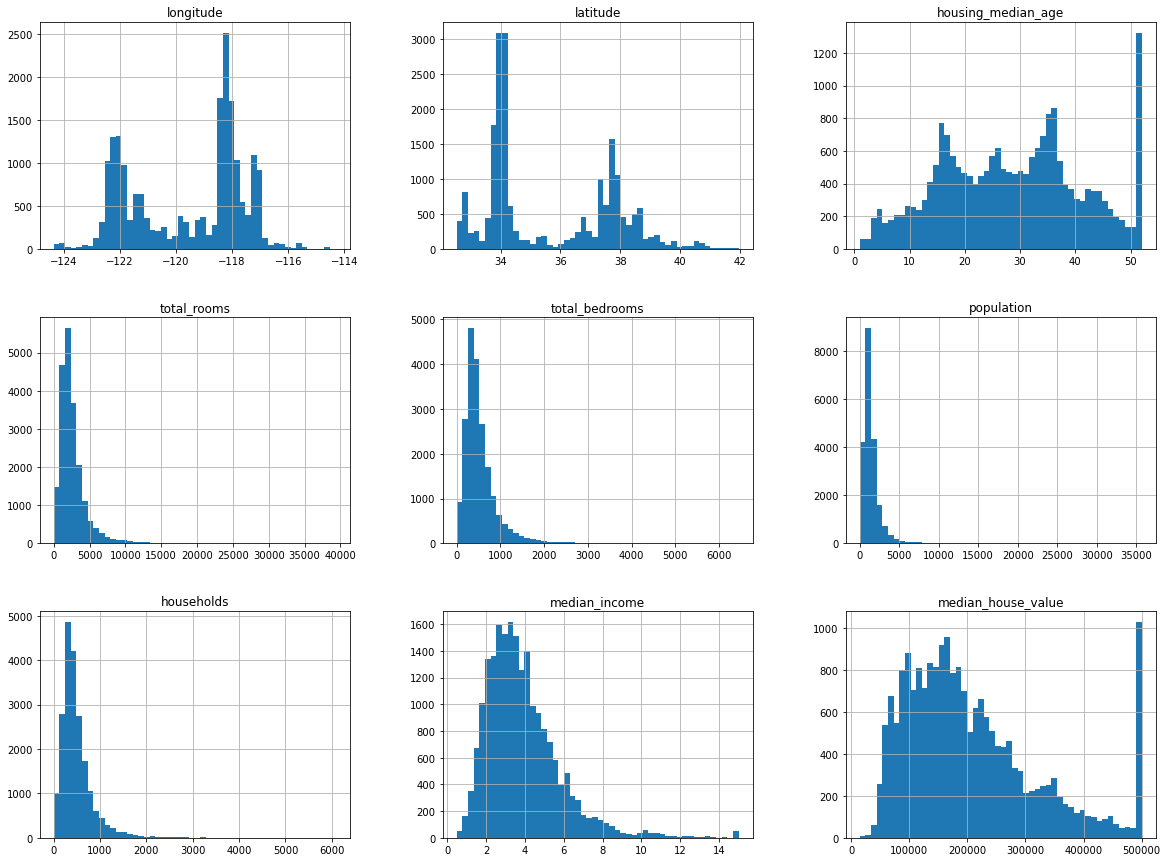

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Spliting the dataset

In [8]:
#seperate test set 
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) #randomly shuffling the indices of the dataset and storing in an array
    #print(shuffled_indices)
    #print(shuffled_indices.shape)
    test_set_size = int(len(data) * test_ratio) #getting the number of samples to be in test set
    test_indices = shuffled_indices[:test_set_size] #take indices from 0 to test_set_size-1 from shuffled_indices for test set
    #print(test_indices.shape)
    train_indices = shuffled_indices[test_set_size:] #take indices from test_set_size to last value from shuffled_indices for training set
    #print(train_indices.shape)
    return data.iloc[train_indices], data.iloc[test_indices] # extract the data with those indices from dataset

In [9]:
train_set, test_set = split_train_test(housing, 0.2)

In [10]:
print(len(train_set))
print(len(test_set))

16512
4128


In [11]:
# to make sure that the samples in test and train set do not get mixed even after updating the data
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2 ** 32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [12]:
housing_with_id = housing.reset_index() # adds an 'index' column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [13]:
test_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20615,20615,-121.54,39.08,23.0,1076.0,216.0,724.0,197.0,2.3598,57500.0,INLAND
20617,20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND
20622,20622,-121.44,39.00,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0,INLAND
20626,20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,INLAND


In [14]:
#using inbuilt functions that will split the dataset into train and test
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [15]:
print(train_set)
print(test_set)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   
14265    -117.11     32.69                36.0       1421.0           367.0   
2271     -119.80     36.78                43.0       2382.0           431.0   
...          ...       ...                 ...          ...             ...   
11284    -117.96     33.78                35.0       1330.0           201.0   
11964    -117.43     34.02                33.0       3084.0           570.0   
5390     -118.38     34.03                36.0       2101.0           569.0   
860      -121.96     37.58                15.0       3575.0           597.0   
15795    -122.42     37.77                52.0       4226.0          1315.0   

       population  households  median_income  media

## Selecting the features

In [16]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6, np.inf], labels=[1,2,3,4,5])

In [17]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

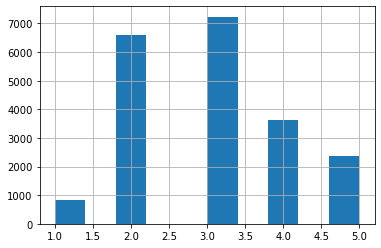

In [18]:
housing["income_cat"].hist()

In [19]:
#dividing the dataset into stratums
#split the dataset so that the proportaion of datasamples remains the same and the dataset for test/train is not getting skewed
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    print(train_index, test_index)
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

[17606 18632 14650 ... 13908 11159 15775] [ 5241 10970 20351 ...  4019 12107  2398]


In [20]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [21]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [22]:
#creating a copy of the training set
housing = strat_train_set.copy()

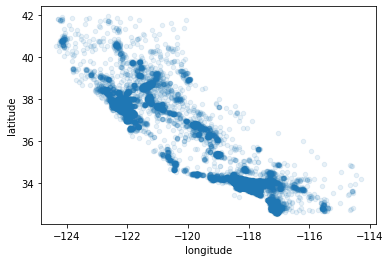

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) #setting alpha=0.1 -> shows the high density area

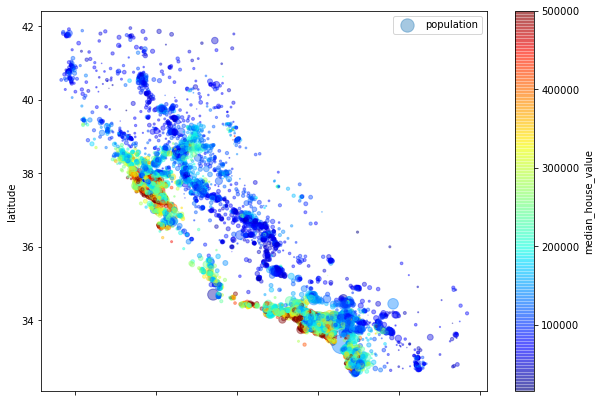

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", figsize=(10,7)
            , c= "median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [25]:
#computing thr correlation between the features
corr_matrix = housing.corr() #pearson's correlation(linear correlation)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [26]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002202E487C88>,
      dtype=object)

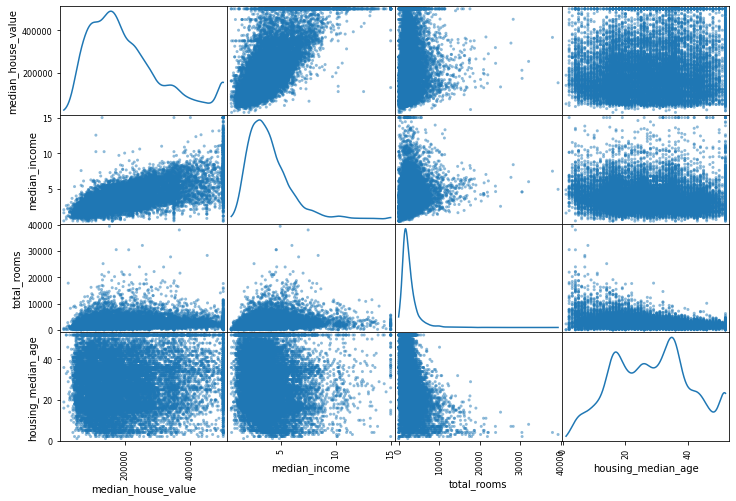

In [27]:
#plotting the correlation of some attributes
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8), diagonal="kde")

#the diagonal would just be a straight line if we are finding the correlation between the same attribute. So pandas plots the
# histogram of the attribute

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002202EBAA488>,
      dtype=object)

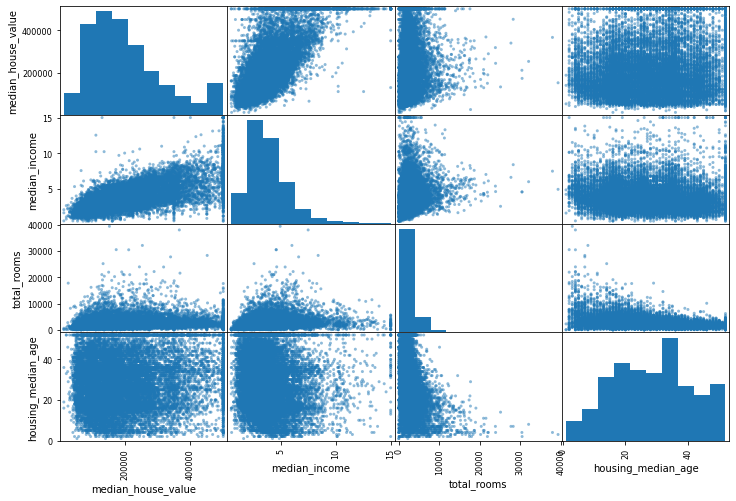

In [28]:
scatter_matrix(housing[attributes], figsize=(12,8), diagonal="hist")

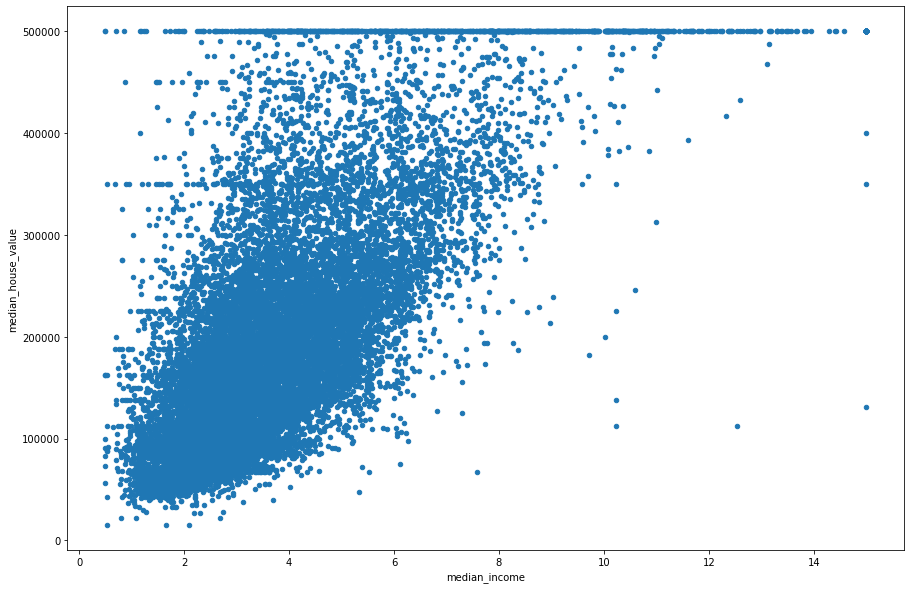

In [29]:
housing.plot(kind="scatter", x = "median_income", y="median_house_value", figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002203018BB08>,
      dtype=object)

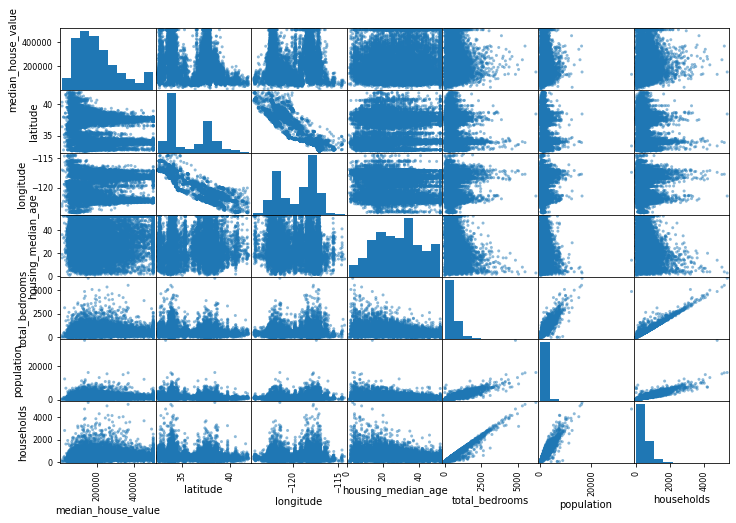

In [30]:
attributes2 = ["median_house_value", "latitude", "longitude", "housing_median_age", "total_bedrooms", "population", "households"]
scatter_matrix(housing[attributes2], figsize=(12,8))

In [31]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [32]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [33]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


In [34]:
#preparing the dataset for feeding into the algorithm
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [35]:
#fixing the attributes for which some values are not available
#can be done any one of the following ways
#1. get rid of the corresponding districts
#2. get rid of the whole attribute
#3.set the values to some value(zero, mean , median etc)

# housing.dropna(subset=["total_bedrooms"]) #option1
# housing.drop("total_bedrooms", axis=1) #option2
# median = housing["total_bedrooms"].median()
# housing["total_bedrooms"].fillna(median, inplace=True) #option3

## Filling in missing values

In [36]:
#replacing the null values using inbuilt function
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") #creating an instance and specifying that the null values of the attribute should 
                                           #be replaced with median
housing_num = housing.drop("ocean_proximity", axis=1) #driping the column with non numerical values
imputer.fit(housing_num) # fit the imputer to the data

SimpleImputer(strategy='median')

In [37]:
#imputer compute the median of each attribute and stores it in statistics_ instance variable
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [38]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [39]:
X = imputer.transform(housing_num) #transfroms the dataset by replacing the null values with median

In [40]:
X #a numpy array

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [41]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index) #converting X into a dataframe
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [42]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


## Transformations

In [43]:
#converting the categorical values to numerical
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [44]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

one issue with the above representation is that thye ML algorithm will consider two adjacent values to the more similar than
the distant ones. But that is not the case for all categorical attributes
Thus, there is another representaion called one-hot encoding
Here, for a given row if a particular category is present, it is marked with 1 and all other categories are marked as 0

In [45]:
#one-hot encoding
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot #return a sparse matrix which save memory usage by storing the location of the 1's

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [46]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [47]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [48]:
housing.values

array([[-121.89, 37.29, 38.0, ..., 339.0, 2.7042, '<1H OCEAN'],
       [-121.93, 37.05, 14.0, ..., 113.0, 6.4214, '<1H OCEAN'],
       [-117.2, 32.77, 31.0, ..., 462.0, 2.8621, 'NEAR OCEAN'],
       ...,
       [-116.4, 34.09, 9.0, ..., 765.0, 3.2723, 'INLAND'],
       [-118.01, 33.82, 31.0, ..., 356.0, 4.0625, '<1H OCEAN'],
       [-122.45, 37.77, 52.0, ..., 639.0, 3.575, 'NEAR BAY']],
      dtype=object)

In [49]:
#custom transformers
#this custom transformer adds the attributes done before
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/ X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Scaling of attributes 
1. Min-Max Scaling(Normalization) -> every value is subracted by min and divided by (max-min). Generally the range is from 0-1
2. Standardization -> subract by mean and divide by standard deviation. Affected much less by outliers

In [50]:
#a pipeline will do the transformation one after the other
#pipeline for numerical attributes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [51]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [52]:
#transformations using a pipeline
from sklearn.compose import ColumnTransformer 

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

## Training the model

In [53]:
#using linear regression algorithm
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [54]:
some_data = housing.iloc[:5] #iloc selects values from a given dataframe/ dataset
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Prediction:", lin_reg.predict(some_data_prepared))

Prediction: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [55]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse #underfitting the model

68628.19819848923

In [56]:
#training using DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [57]:
housing_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [58]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse #overfitting the model

0.0

In [59]:
#measuring the performance of the model using K-fold cross-validation 
#the following code randomly splits the training dataset into 10 subsets and trains and evaluated the decision tree model 10 times

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
        scoring = "neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)


In [60]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [68898.29909684 65991.23720567 71042.76979532 70301.26710487
 70639.18623473 75469.17077946 71487.56659382 72418.60830026
 77096.92824571 69625.58719615]
Mean: 71297.06205528525
Standard deviation: 3008.784455463311


In [61]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
        scoring = "neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983425


In [62]:
#training using RandomForestRegressor
#it works by training many decision trees on random subsets of the features, then averaging out their predictions
#Ensemble learning - building a model on top of many other models

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse 

18566.010457281973

In [63]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
        scoring = "neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [49946.32644945 47745.61166983 49790.52346114 52682.9966347
 49774.1658966  53539.55760123 48834.30079004 47957.53707028
 52504.04975632 49877.14373163]
Mean: 50265.22130612193
Standard deviation: 1897.878102249763


## Fine tuning the model

In [64]:
#find combinations of hyperparameters
#using GridSearchCV - mention the hyperparameters and it will use cross-validation to eveluate all possible combinations of 
#hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3, 10, 30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2,3,4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [65]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [66]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [67]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63908.91082260971 {'max_features': 2, 'n_estimators': 3}
55556.08314524242 {'max_features': 2, 'n_estimators': 10}
52918.184332548306 {'max_features': 2, 'n_estimators': 30}
60007.9118057041 {'max_features': 4, 'n_estimators': 3}
53290.657007979076 {'max_features': 4, 'n_estimators': 10}
50550.358189406616 {'max_features': 4, 'n_estimators': 30}
58898.124157471175 {'max_features': 6, 'n_estimators': 3}
52541.60988928391 {'max_features': 6, 'n_estimators': 10}
50130.80197340965 {'max_features': 6, 'n_estimators': 30}
59061.03603732344 {'max_features': 8, 'n_estimators': 3}
51881.04362269031 {'max_features': 8, 'n_estimators': 10}
50119.07452146572 {'max_features': 8, 'n_estimators': 30}
61855.192144962246 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54287.846897212796 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59641.27630793275 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52817.78833427505 {'bootstrap': False, 'max_features': 3, 'n_estimators

### another method for fine tuning the model is be using Randomized Search - it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration

In [68]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.22827067e-02, 6.29135238e-02, 4.18729975e-02, 1.49754091e-02,
       1.50062347e-02, 1.50024737e-02, 1.38953398e-02, 3.64161658e-01,
       3.83912612e-02, 1.10288562e-01, 8.30094675e-02, 6.56270847e-03,
       1.56740702e-01, 6.91955376e-05, 1.89612989e-03, 2.93163023e-03])

In [69]:
extra_attribs = ["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3641616576080878, 'median_income'),
 (0.15674070179934851, 'INLAND'),
 (0.11028856245454062, 'pop_per_hhold'),
 (0.08300946748164763, 'bedrooms_per_room'),
 (0.07228270669453982, 'longitude'),
 (0.06291352381569887, 'latitude'),
 (0.04187299746580088, 'housing_median_age'),
 (0.038391261199615695, 'rooms_per_hhold'),
 (0.015006234718332097, 'total_bedrooms'),
 (0.015002473681159204, 'population'),
 (0.014975409113850006, 'total_rooms'),
 (0.013895339830926546, 'households'),
 (0.006562708472217739, '<1H OCEAN'),
 (0.002931630233743606, 'NEAR OCEAN'),
 (0.001896129892902013, 'NEAR BAY'),
 (6.919553758896608e-05, 'ISLAND')]

## Evaluate on the test set

In [70]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [71]:
final_rmse

47752.30869793941

In [72]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([45765.99687888, 49659.23380046])